Consider that we have a multi frequency signal. And we want to study it. We will take windows of such signal, and
perform FFT on it. We want to make sure we capture the periodicity of the signal, and we want to understand 
how big the window should be to capture with enough precision the frequencies we are trying to determine.

In [131]:
"""
y will be our signal, composed of a number of sinusoidal waves with different frequencies.
"""
import numpy as np
# Size is the amount of data points in the original signal
max_val = 100
step = 0.1
x = np.arange(0,max_val,step)
size = len(x)
# Here comes the frequency list
freq_list = [0.5,2,4,10]
# a_0 is the initial phase
a_0 = 0.75 * np.pi
# We initialize y
y=0
for freq in freq_list:
    y = y + np.sin(freq * 2 * np.pi * x + a_0)


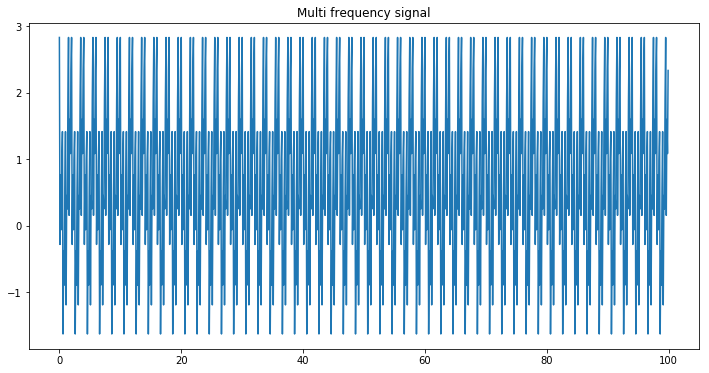

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=((12,6)))
plt.plot(x,y)
plt.title('Multi frequency signal')
plt.show()

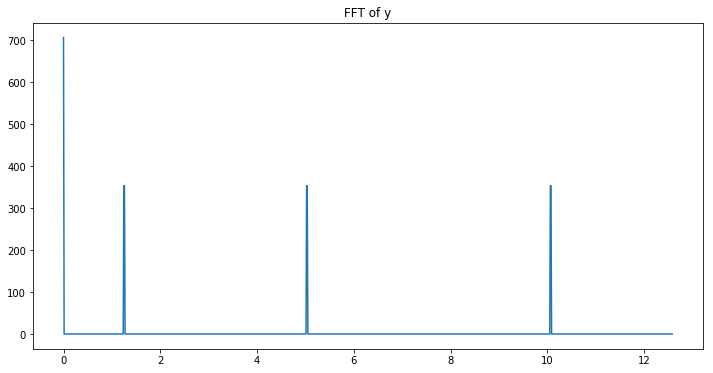

In [137]:
from scipy.fftpack import rfft
y_fft = rfft(y)
y_fft_abs = np.abs(y_fft)
plt.figure(figsize=((12,6)))
plt.plot(x*2*np.pi/max_x, y_fft_abs)
plt.title('FFT of y')
plt.show()


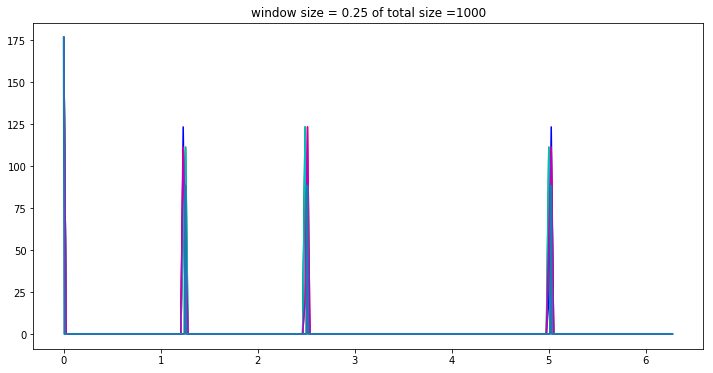

In [129]:
"""
But what about if we consider windows of fixed size in different part of the signal?
We will consider a window size, and calculate the FFT in different parts of the signal. Then 
we will plot all the rfft in the same plot, so see if they match
"""
import random
from itertools import cycle
colors=cycle(['b','g','r','c','m','y','k'])
window_size = int(1.*size/4)
attempts = 5
plt.figure(figsize=((12,6)))
for i in range(attempts):
    window_left = int((size-window_size)*random.random())
    data = y[window_left:window_left+window_size]
    temp_rfft = np.abs(rfft(data))
    plt.plot(np.arange(len(data))*(2*np.pi/window_size),temp_rfft,color=colors.next())
plt.title('window size = '+str(1.0*window_size/size)+' of total size ='+str(size))
# We also plot the original signal rfft to compare, but normalized to the window size
normalized_y_fft_abs = y_fft_abs *(1.0*window_size / size)
plt.plot(x*(2*np.pi/max_val),normalized_y_fft_abs,lw=2)
plt.show()


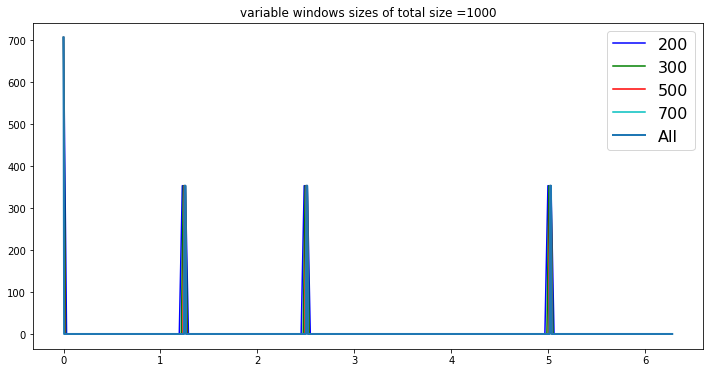

In [130]:
"""
But what about if we consider windows of different size, in a fixed part of the signal?
Since windows will have different size, all windows will start in 0.
We will consider a window size, and calculate the FFT in different parts of the signal. Then 
we will plot all the rfft in the same plot, so see if they match.
Notice that changing the window size, changes the height of the peaks, so we must normalize
using each window size.
"""
import random
from itertools import cycle
colors=cycle(['b','g','r','c','m','y','k'])
attempts = 5
plt.figure(figsize=((12,6)))
window_size_list = [int(size*0.2),int(size*0.3),int(size*0.5),int(size*0.7)]
for window_size in window_size_list:
    window_left = 0
    data = y[window_left:window_left+window_size]
    temp_rfft = np.abs(rfft(data))
    plt.plot(np.arange(len(data))*(2*np.pi/window_size),temp_rfft*(1.0*size / window_size),color=colors.next(),
            label=str(window_size))
plt.title('variable windows sizes of total size ='+str(size))
# We also plot the original signal rfft to compare, but normalized to the window size
plt.plot(x*(2*np.pi/max_val),y_fft_abs,lw=2,label='All')
plt.legend(fontsize=16)
plt.show()

# Resolution

The critical factor is how much resolution you need in the frequency domain to discriminate between different vowels. Resolution is 1 / T, where T is the duration of your FFT window. So if you sample for 62.5 ms then your maximum resolution is 16 Hz (i.e. each FFT bin is 16 Hz wide) if your FFT is the same size as your sampling interval (1024 samples). If you go to a smaller FFT then obviously your resolution will worsen proportionately, e.g. a 512 point FFT would only have a resolution of 32 Hz.

In [139]:
max_val = 10000
step = 0.1
x = np.arange(0,max_val,step)
size = len(x)
# Here comes the frequency list
freq_list = [5,9]
# a_0 is the initial phase
a_0 = 0.75 * np.pi
# We initialize y
y=0
for freq in freq_list:
    y = y + np.sin(freq * 2 * np.pi * x + a_0)


Let's consider the sampling rate $$f_s$$ to sample a signal. Due to the Shannon Theorem, we can only extract frequencies $$ \frac{-f_s}{2} \leq f \leq \frac{f_s}{2}$$ (between positive and negative Nyquist frequency).
So we have the spectral resolution $$\Delta f$$ as:

$$\Delta f = \frac{1}{T} = \frac{1}{k \Delta t} = \frac{f_s}{k} [Hz]$$

So we see that the longer the time T we measure, the better the resolution.
That is, if we take 64 measurements per second, that is a sampling rate of $$f_s = \frac{1}{64} Hz \simeq 0.015 Hz$$
Suppose we measure 1024 measurements (data points). That is k = 1024/64 = 16 measurements.
We cannot detect any frequency larger than $$f \leq \frac{f_s}{2} \pm \Delta f = \frac{1}{2 \times 64} \pm \frac{1}{64 \times 16} = (0.0781 \pm 0.0009)Hz $$

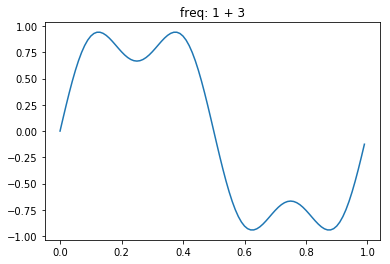

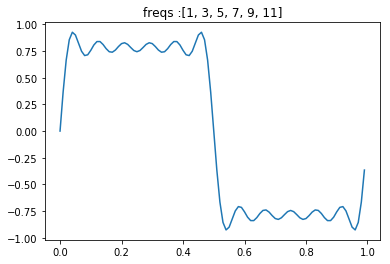

In [189]:
#A short demonstration of constructing square waves using cosine function:
# http://www.staff.vu.edu.au/msek/Frequency%20Analysis%20-%20FFT.pdf
x=np.arange(0,1,0.01)
def func(freq):
    return np.cos(2*np.pi*freq*x - np.pi/2.)

y1 = func(1.)
y2 = 1./3*func(3.)
y=y1+y2
plt.plot(x,y)
plt.title('freq: 1 + 3')
plt.show()

y=0
freq_list = [1,3,5,7,9,11]
for freq in freq_list:
    y=y+1./freq*func(freq)
plt.plot(x,y)
plt.title('freqs :'+str(freq_list))
plt.show()

# Frequency Scale
Ref: https://electronics.stackexchange.com/questions/79647/how-to-select-frequency-resolution-and-window-size-in-fft
        
Since you are working with a fixed sample rate, your FFT length (which will require your window to be at the same 
width) will increase your frequency resolution. The benefit of having a finer frequency resolution is twofold: 
the apparent one is that you get a finer freqeuecy resolution, so that you might be able to distinguish two signals 
that are very close in frequency. The second one is that, with a higher frequency resolution, your FFT noise floor 
will be lower. The noise in your system has a fixed power, unrelated to the number of points of your FFT, and that 
power is distributed evenly (if we're talking white noise) to all your frequency components. Thus, having more 
frequency components mean that individual noise contribution of your frequency bins will be lowered, while the total
integrated noise stays the same, which results in a lower noise floor. This will allow you to distinguish a higher 
dynamic range.

However, there are drawbacks to using a longer FFT. First one is that you'll need more processing power. The FFT is 
a O(NlogN) algorithm, where N is the number of points. While it may not be as dramatic as the naive DFT, the 
increase in N will start to bleed your processor, especially if you're working in the confines of an embedded system. 
Secondly, when you increase N, you're gaining frequency resolution while you're losing time resolution. With a bigger 
N, you need to take more samples to arrive at your frequency domain result, which means that you need to take samples
for a longer time. You will be able to detect a higher dynamic range and finer frequency resolution, but if you're 
looking for spurs, you'll have a less clear idea about WHEN that spur occurred exactly.

The type of window you should use is a whole other subject, which I'm not that informed to give you an answer to 
WHICH one is better. However, different windows have different output characteristics, of which most(if not all) are 
reversible post processing the FFT result. Some windows may make your frequency components bleed to side bins (if I'm 
not mistaken, the Hanning window makes your components appear on three bins.), others may give you a better frequency
accuracy while introducing some gain error to your components. This is completely dependent to the nature of result 
you're trying to achieve, so I'd do some research (or some simulations) to arrive at which one is the best for your 
specific application.

Ref: https://stackoverflow.com/questions/4225432/how-to-compute-frequency-of-data-using-fft

if $x[n] = \cos{(2 \  \pi \ f_0 \ \frac{n}{f_s})}$ where $f_0$ is the frequency of the sinusoid in Hertz.
$n=0:N-1$ and $f_s$ is the sampling rate of $x$ in samples per second.

Let Y = fft(x). Both $Y$ and $x$ have length $N$. Suppose $Y$ has two peaks at $n_0$ and $N-n_0$.

Then the sinusoid frequency is $f_0 = f_s \frac{n_0}{N} Hz$.

EXAMPLE:
$f_s = 8000$ samples per second, $N=16000$ samples. Therefore, $x$ lasts two seconds long.
Suppose $Y=fft(x)$ has peaks at $n_0 = 2000$ and $N-n_0=14000=16000-2000$. Therefore, 
$f_0 = \frac{8000 \times 2000}{16000} = 1000 Hz$

N Samples = 300
Known Frequency = 4.56 Hz
Sampling Rate = 10.0 Hz


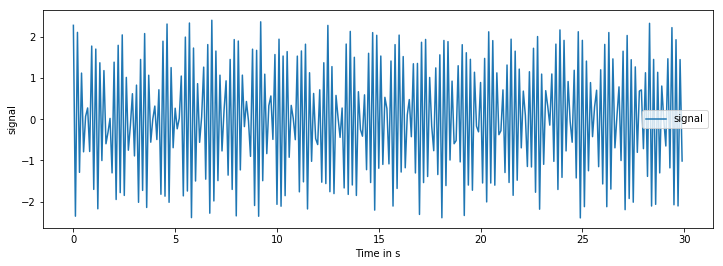

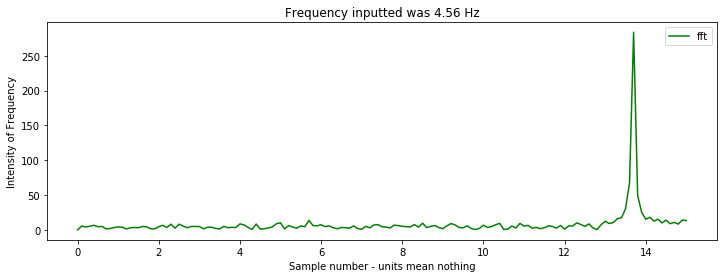

Detected Frequency = 4.56666666667
 CAREFUL : Sampling rate should be at least 2x the expected frequency


In [365]:
import numpy as np
from scipy.fftpack import rfft
import matplotlib.pyplot as plt

signal_max = 30
dt = 0.1 # this is 1/sampling_rate.
t = np.arange(0,signal_max,dt)
N_Samples = len(t)
print "N Samples = "+str(N_Samples)
f0 = 4.56  # This is the frequency of the signal
print "Known Frequency = "+str(f0)+' Hz'

# Fixed after this:
sampling_rate = 1./dt
print 'Sampling Rate = '+str(sampling_rate)+' Hz'
signal = 2* np.cos(2 * np.pi * f0 * t) - 0.5 + np.random.random(len(t)) # this is a signal
signal = signal - np.mean(signal) # we substract the mean to avoid DC offset.
# we plot the signal:
plt.figure(figsize=((12,4)))
plt.plot(t,signal,label='signal')
plt.legend()
plt.xlabel('Time in s')
plt.ylabel('signal')
plt.show()

fft = np.fft.rfft(signal) # we take the rFFT for only the positive part

plt.figure(figsize=((12,4)))
# discard half upper part of the time, this axis won't mean anything now
t = t[:int(N_Samples/2.)+1]
plt.plot(t,np.abs(fft),color='green',label='fft')
#plt.plot(fft_index,np.abs(fft),color='green',label='fft')
plt.legend()
plt.title('Frequency inputted was '+str(f0)+' Hz')
plt.xlabel('Sample number - units mean nothing')
plt.ylabel('Intensity of Frequency')
#plt.xticks(np.arange(-max(t), max(t), 0.05*(max(t)-min(t))))
plt.show()
print 'Detected Frequency = '+str(sampling_rate*np.argmax(fft)*dt/signal_max)
print ' CAREFUL : Sampling rate should be at least 2x the expected frequency'

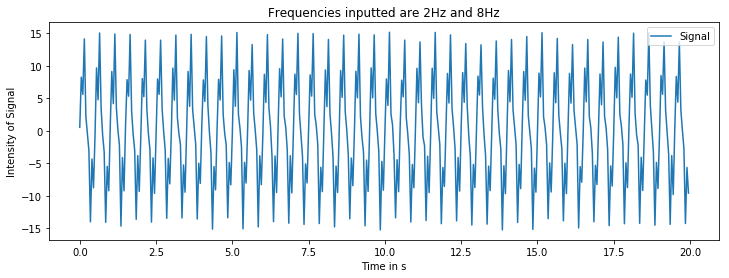

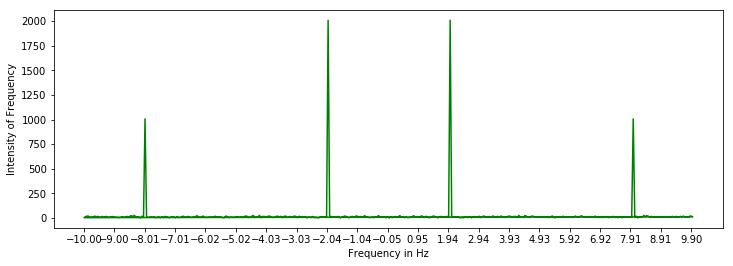

In [319]:
# Based on https://stackoverflow.com/questions/9456037/scipy-numpy-fft-frequency-analysis
import scipy
import scipy.fftpack
import matplotlib.pyplot as plt
import numpy as np
# How often we take 1 sample
dt=0.05
# How many samples per second
sampling_rate = 1./dt
t = np.arange(0,20,dt)
# We consider a signal with 2 frequencies and white noise
acc = lambda t: 10*np.sin(2*np.pi*2.0*t) + 5*np.sin(2*np.pi*8.0*t) + 2*np.random.random(len(t))

signal = acc(t)
# We can remove the mean and thus eliminate the 0th modes:
signal = signal - np.mean(signal)

plt.figure(figsize=((12,4)))
plt.plot(t,signal,label='Signal')
plt.legend()
plt.title('Frequencies inputted are 2Hz and 8Hz')
plt.xlabel('Time in s')
plt.ylabel('Intensity of Signal')
plt.show()

FFT = abs(scipy.fft(signal))
# now we use fftfreq : Return the Discrete Fourier Transform sample frequencies.
# We feed it the size of the signal and the dt
freqs = scipy.fftpack.fftfreq(signal.size, dt)
plt.figure(figsize=((12,4)))
plt.xlabel('Frequency in Hz')
plt.ylabel('Intensity of Frequency')
plt.xticks(np.arange(min(freqs), max(freqs), 0.1*max(freqs)))


plt.plot(freqs,FFT,color='green',label='FFT')
plt.show()

# Self Correlation

Now we will analyze taking different chunks of data from the signal, and see if we can detect auto-correlation.
For that we will generate a very long signals, and we will play with the window size.